In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from random import shuffle
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
import time
from sklearn.metrics import accuracy_score

In [11]:
df = pd.read_csv('taxi_data.csv', nrows = 1000000)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [12]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.521659,1.738462,3.240361,-72.765110,40.085274,1.048842,-72.818357,40.115370,1.440028,12.785879,0.212128,0.497038,1.531398,0.315954,0.299712,15.642105
std,0.499531,1.329592,3.989969,9.367662,5.160466,0.481473,9.164208,5.048679,0.514079,11.770428,0.264813,0.040916,2.946590,1.944062,0.012749,14.222445
min,1.000000,0.000000,0.000000,-81.101891,0.000000,1.000000,-76.143623,0.000000,1.000000,-300.000000,-0.500000,-0.500000,-3.000000,-17.400000,-0.300000,-300.800000
25%,1.000000,1.000000,1.070000,-73.991386,40.733456,1.000000,-73.990913,40.732273,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.000000
50%,2.000000,1.000000,1.820000,-73.981552,40.752167,1.000000,-73.979340,40.752380,1.000000,9.000000,0.000000,0.500000,1.000000,0.000000,0.300000,11.160000
75%,2.000000,2.000000,3.530000,-73.964157,40.768257,1.000000,-73.959373,40.769306,2.000000,14.500000,0.500000,0.500000,2.050000,0.000000,0.300000,17.160000
max,2.000000,8.000000,518.200000,0.000000,57.269276,99.000000,0.000000,48.233334,4.000000,1463.750000,7.000000,0.890000,998.140000,923.580000,0.300000,1463.750000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1000000 non-null  int64  
 1   tpep_pickup_datetime   1000000 non-null  object 
 2   tpep_dropoff_datetime  1000000 non-null  object 
 3   passenger_count        1000000 non-null  int64  
 4   trip_distance          1000000 non-null  float64
 5   pickup_longitude       1000000 non-null  float64
 6   pickup_latitude        1000000 non-null  float64
 7   RatecodeID             1000000 non-null  int64  
 8   store_and_fwd_flag     1000000 non-null  object 
 9   dropoff_longitude      1000000 non-null  float64
 10  dropoff_latitude       1000000 non-null  float64
 11  payment_type           1000000 non-null  int64  
 12  fare_amount            1000000 non-null  float64
 13  extra                  1000000 non-null  float64
 14  mta_tax            

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


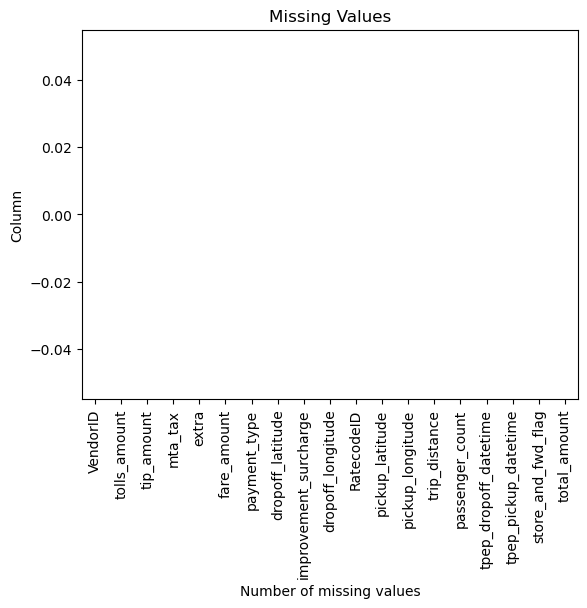

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)
df.isnull().sum().sort_values().plot(kind = 'bar')
plt.title('Missing Values')
plt.xlabel("Number of missing values")
plt.ylabel("Column")
plt.show()

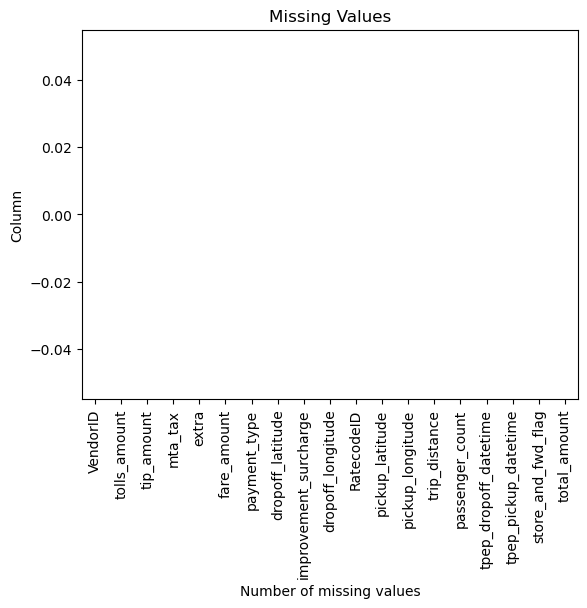

In [21]:
missing_values = df.isnull().sum()
df.isnull().sum().sort_values().plot(kind = 'bar')
plt.title('Missing Values')
plt.xlabel("Number of missing values")
plt.ylabel("Column")
plt.show()

In [16]:
print(df.dtypes)

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object


In [22]:
data = df.copy()
data = data.dropna()
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [23]:
data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,980877.000000,980877.000000,980877.000000,980877.000000,980877.000000,980877.000000,980877.000000,980877.000000,980877.000000,980877.00000,980877.000000,980877.000000,980877.000000,980877.000000,980877.000000,980877.000000
mean,1.525965,1.742082,3.236883,-73.971116,40.749648,1.041347,-73.971667,40.750795,1.438357,12.68499,0.212343,0.497991,1.524181,0.311038,0.299985,15.530528
std,0.499326,1.333769,3.934812,0.041940,0.030456,0.348695,0.037889,0.034444,0.511936,10.80335,0.264434,0.031632,2.891763,1.926453,0.002142,13.307767
min,1.000000,1.000000,0.000000,-74.384727,40.386490,1.000000,-74.594658,40.238136,1.000000,0.01000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000
25%,1.000000,1.000000,1.080000,-73.991501,40.734535,1.000000,-73.991043,40.733490,1.000000,6.50000,0.000000,0.500000,0.000000,0.000000,0.300000,8.150000
50%,2.000000,1.000000,1.830000,-73.981888,40.752628,1.000000,-73.979713,40.752934,1.000000,9.00000,0.000000,0.500000,1.000000,0.000000,0.300000,11.160000
75%,2.000000,2.000000,3.540000,-73.965767,40.768559,1.000000,-73.960709,40.769718,2.000000,14.50000,0.500000,0.500000,2.050000,0.000000,0.300000,17.150000
max,2.000000,8.000000,518.200000,-73.210007,41.318478,99.000000,-73.210007,41.753662,4.000000,99.50000,7.000000,0.890000,998.140000,923.580000,0.300000,1004.940000


In [ ]:
#target column for encoding could be 